## Clustering Algorithms and PCA using Covid Dataset

In [16]:
#Reading Dataset
import pandas as pd
data=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')
df2=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data2.csv')
df3=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data3.csv')
df4=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data4.csv')
df5=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data5.csv')
df6=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data6.csv')
df7=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data7.csv')

In [17]:
#Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17364 entries, 0 to 17363
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient Number                             17306 non-null  float64
 1   State Patient Number                       2457 non-null   object 
 2   Date Announced                             17364 non-null  object 
 3   Estimated Onset Date                       0 non-null      float64
 4   Age Bracket                                1670 non-null   object 
 5   Gender                                     3746 non-null   object 
 6   Detected City                              2166 non-null   object 
 7   Detected District                          14978 non-null  object 
 8   Detected State                             17363 non-null  object 
 9   State code                                 17363 non-null  object 
 10  Current Status        

In [18]:
#Columns of Dataframe
data.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

In [19]:
#Adding all dataframes to one dataframe.
data.append([df2,df3,df4,df5,df6,df7])

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22765,NaN,NaN,30/06/2020,NaN,NaN,NaN,NaN,NaN,Goa,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.0,94844.0
22766,NaN,NaN,30/06/2020,NaN,NaN,NaN,NaN,South Goa,Goa,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,94845.0
22767,NaN,NaN,30/06/2020,NaN,NaN,NaN,NaN,NaN,Goa,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19.0,94846.0
22768,NaN,NaN,30/06/2020,NaN,NaN,NaN,NaN,South Goa,Goa,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,94847.0


In [20]:
data.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

In [21]:
# Consider Necessary Columns
data=data.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]

In [22]:
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status
0,1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered
1,1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered
2,1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered
3,1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered
4,1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered
...,...,...,...,...,...,...,...,...
17359,-2,16/04/2020,NaN,NaN,NaN,NaN,Maharashtra,Hospitalized
17360,1,18/04/2020,NaN,NaN,NaN,Nagpur,Maharashtra,Hospitalized
17361,-1,18/04/2020,NaN,NaN,NaN,NaN,Maharashtra,Hospitalized
17362,10,19/04/2020,NaN,NaN,NaN,Nagpur,Maharashtra,Hospitalized


In [23]:
#Splitting Date into Day,Month and Year.
data['Date Announced']=pd.to_datetime(data['Date Announced'])
data['day']=data['Date Announced'].dt.day
data['year']=data['Date Announced'].dt.year
data['month']=data['Date Announced'].dt.month

In [24]:
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,day,year,month
0,1,2020-01-30,20,F,Thrissur,Thrissur,Kerala,Recovered,30,2020,1
1,1,2020-02-02,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2020,2
2,1,2020-03-02,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,2,2020,3
3,1,2020-02-03,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,3,2020,2
4,1,2020-02-03,24,M,Hyderabad,Hyderabad,Telangana,Recovered,3,2020,2
...,...,...,...,...,...,...,...,...,...,...,...
17359,-2,2020-04-16,NaN,NaN,NaN,NaN,Maharashtra,Hospitalized,16,2020,4
17360,1,2020-04-18,NaN,NaN,NaN,Nagpur,Maharashtra,Hospitalized,18,2020,4
17361,-1,2020-04-18,NaN,NaN,NaN,NaN,Maharashtra,Hospitalized,18,2020,4
17362,10,2020-04-19,NaN,NaN,NaN,Nagpur,Maharashtra,Hospitalized,19,2020,4


In [25]:
#Creating dummy variables for State- To convert categorical to numeric.
state=pd.get_dummies(data['Detected State'],drop_first=True)
frames=[data,state]
data=pd.concat(frames,axis=1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17364 entries, 0 to 17363
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Num Cases          17364 non-null  int64         
 1   Date Announced     17364 non-null  datetime64[ns]
 2   Age Bracket        1670 non-null   object        
 3   Gender             3746 non-null   object        
 4   Detected City      2166 non-null   object        
 5   Detected District  14978 non-null  object        
 6   Detected State     17363 non-null  object        
 7   Current Status     17364 non-null  object        
 8   day                17364 non-null  int64         
 9   year               17364 non-null  int64         
 10  month              17364 non-null  int64         
 11  Andhra Pradesh     17364 non-null  uint8         
 12  Arunachal Pradesh  17364 non-null  uint8         
 13  Assam              17364 non-null  uint8         
 14  Bihar 

In [27]:
data.columns

Index(['Num Cases', 'Date Announced', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'Current Status', 'day', 'year',
       'month', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'],
      dtype='object')

In [28]:
# Drop unnecessary columns
data=data.drop(['Age Bracket','Date Announced','Gender', 'Detected City','Detected District', 'Detected State', 'Current Status'],axis=1)
data

,Num Cases,day,year,month,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Odisha,Puducherry,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,1,30,2020,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,2020,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,2020,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,2020,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,2020,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359,-2,16,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17360,1,18,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17361,-1,18,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17362,10,19,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17364 entries, 0 to 17363
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Num Cases          17364 non-null  int64
 1   day                17364 non-null  int64
 2   year               17364 non-null  int64
 3   month              17364 non-null  int64
 4   Andhra Pradesh     17364 non-null  uint8
 5   Arunachal Pradesh  17364 non-null  uint8
 6   Assam              17364 non-null  uint8
 7   Bihar              17364 non-null  uint8
 8   Chandigarh         17364 non-null  uint8
 9   Chhattisgarh       17364 non-null  uint8
 10  Delhi              17364 non-null  uint8
 11  Goa                17364 non-null  uint8
 12  Gujarat            17364 non-null  uint8
 13  Haryana            17364 non-null  uint8
 14  Himachal Pradesh   17364 non-null  uint8
 15  Jammu and Kashmir  17364 non-null  uint8
 16  Jharkhand          17364 non-null  uint8
 17  Karnataka   

In [30]:
X=data.iloc[:,:].values
X

array([[   1,   30, 2020, ...,    0,    0,    0],
       [   1,    2, 2020, ...,    0,    0,    0],
       [   1,    2, 2020, ...,    0,    0,    0],
       ...,
       [  -1,   18, 2020, ...,    0,    0,    0],
       [  10,   19, 2020, ...,    0,    0,    0],
       [ -10,   19, 2020, ...,    0,    0,    0]], dtype=int64)

In [31]:
X.shape

(17364, 35)

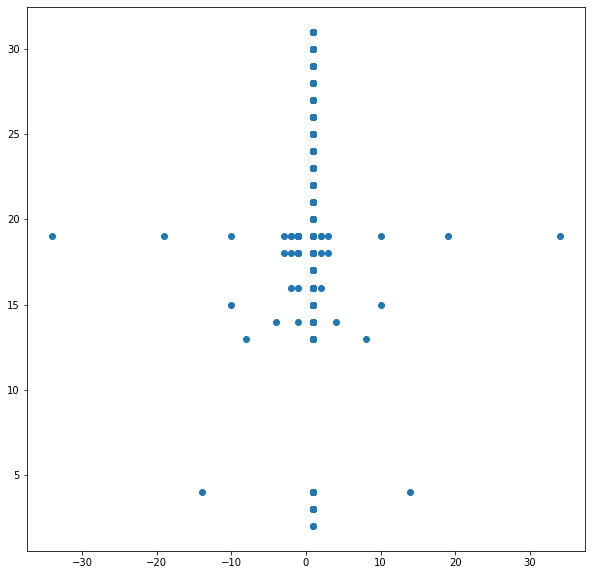

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1])

### KMeans Clustering

In [33]:
from sklearn.cluster import KMeans
k=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    k.append(kmeans.inertia_)

In [34]:
k

[1178009.6577976972,
 308849.8142830168,
 159647.88519461235,
 90450.02481062328,
 57758.92274460189,
 46934.73482545323,
 40734.98243901303,
 36266.37916580741,
 31268.600947957057,
 29357.57869968632]

Text(0.5, 1.0, 'The Elbow Method')

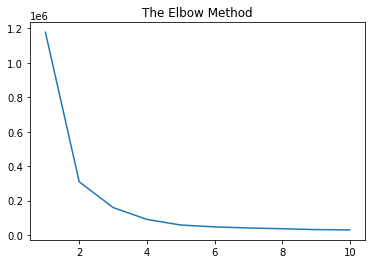

In [35]:
plt.plot(range(1,11),k)
plt.title('The Elbow Method')

From n_clusters=3, we will get optimal clusters. So, we are considering as 3.

In [36]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [37]:
ypred=kmeans.predict(X)
ypred

array([1, 0, 0, ..., 2, 2, 2])

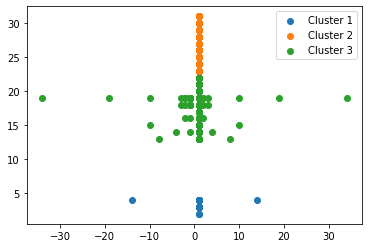

In [38]:
plt.scatter(X[ypred==0,0],X[ypred==0,1],label='Cluster 1')
plt.scatter(X[ypred==1,0],X[ypred==1,1],label='Cluster 2')
plt.scatter(X[ypred==2,0],X[ypred==2,1],label='Cluster 3')

plt.legend()
plt.show()

### Hierarchial Clustering

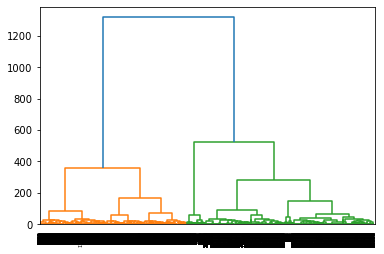

In [24]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()

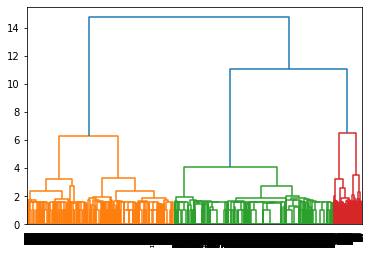

In [35]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='average'))
plt.show()

### Agglomerative Clustering

In [39]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
ypred_ac=ac.fit_predict(X)
ypred_ac

array([2, 0, 0, ..., 1, 1, 4], dtype=int64)

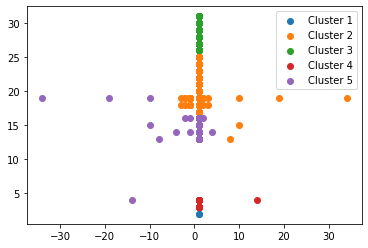

In [40]:
plt.scatter(X[ypred_ac==0,0],X[ypred_ac==0,1],label='Cluster 1')
plt.scatter(X[ypred_ac==1,0],X[ypred_ac==1,1],label='Cluster 2')
plt.scatter(X[ypred_ac==2,0],X[ypred_ac==2,1],label='Cluster 3')
plt.scatter(X[ypred_ac==3,0],X[ypred_ac==3,1],label='Cluster 4')
plt.scatter(X[ypred_ac==4,0],X[ypred_ac==4,1],label='Cluster 5')
plt.legend()
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
acs=AgglomerativeClustering(n_clusters=5,affinity='manhattan',linkage='single')
ypred_acs=acs.fit_predict(X)
ypred_acs

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

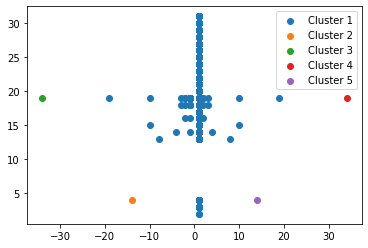

In [42]:
plt.scatter(X[ypred_acs==0,0],X[ypred_acs==0,1],label='Cluster 1')
plt.scatter(X[ypred_acs==1,0],X[ypred_acs==1,1],label='Cluster 2')
plt.scatter(X[ypred_acs==2,0],X[ypred_acs==2,1],label='Cluster 3')
plt.scatter(X[ypred_acs==3,0],X[ypred_acs==3,1],label='Cluster 4')
plt.scatter(X[ypred_acs==4,0],X[ypred_acs==4,1],label='Cluster 5')
plt.legend()
plt.show()

### PCA

In [32]:
X=data.drop('Num Cases',axis=1)
y=data['Num Cases']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
x_test=pca.transform(X_test)
pca.explained_variance_ratio_

array([0.91046353, 0.07659384])